**Logistic Regression Model**

*Breast Cancer Wisconsin dataset is used in here and gradient descent is used to find the weights for the logistic regression problem and applied  to the dataset* 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     bc = load_breast_cancer()
     X, y = bc.data, bc.target

**Explore the dataset**

In [3]:
print(f"The shape of x is:{X.shape}")
print(f"The shape of y is:{y.shape}")

The shape of x is:(569, 30)
The shape of y is:(569,)


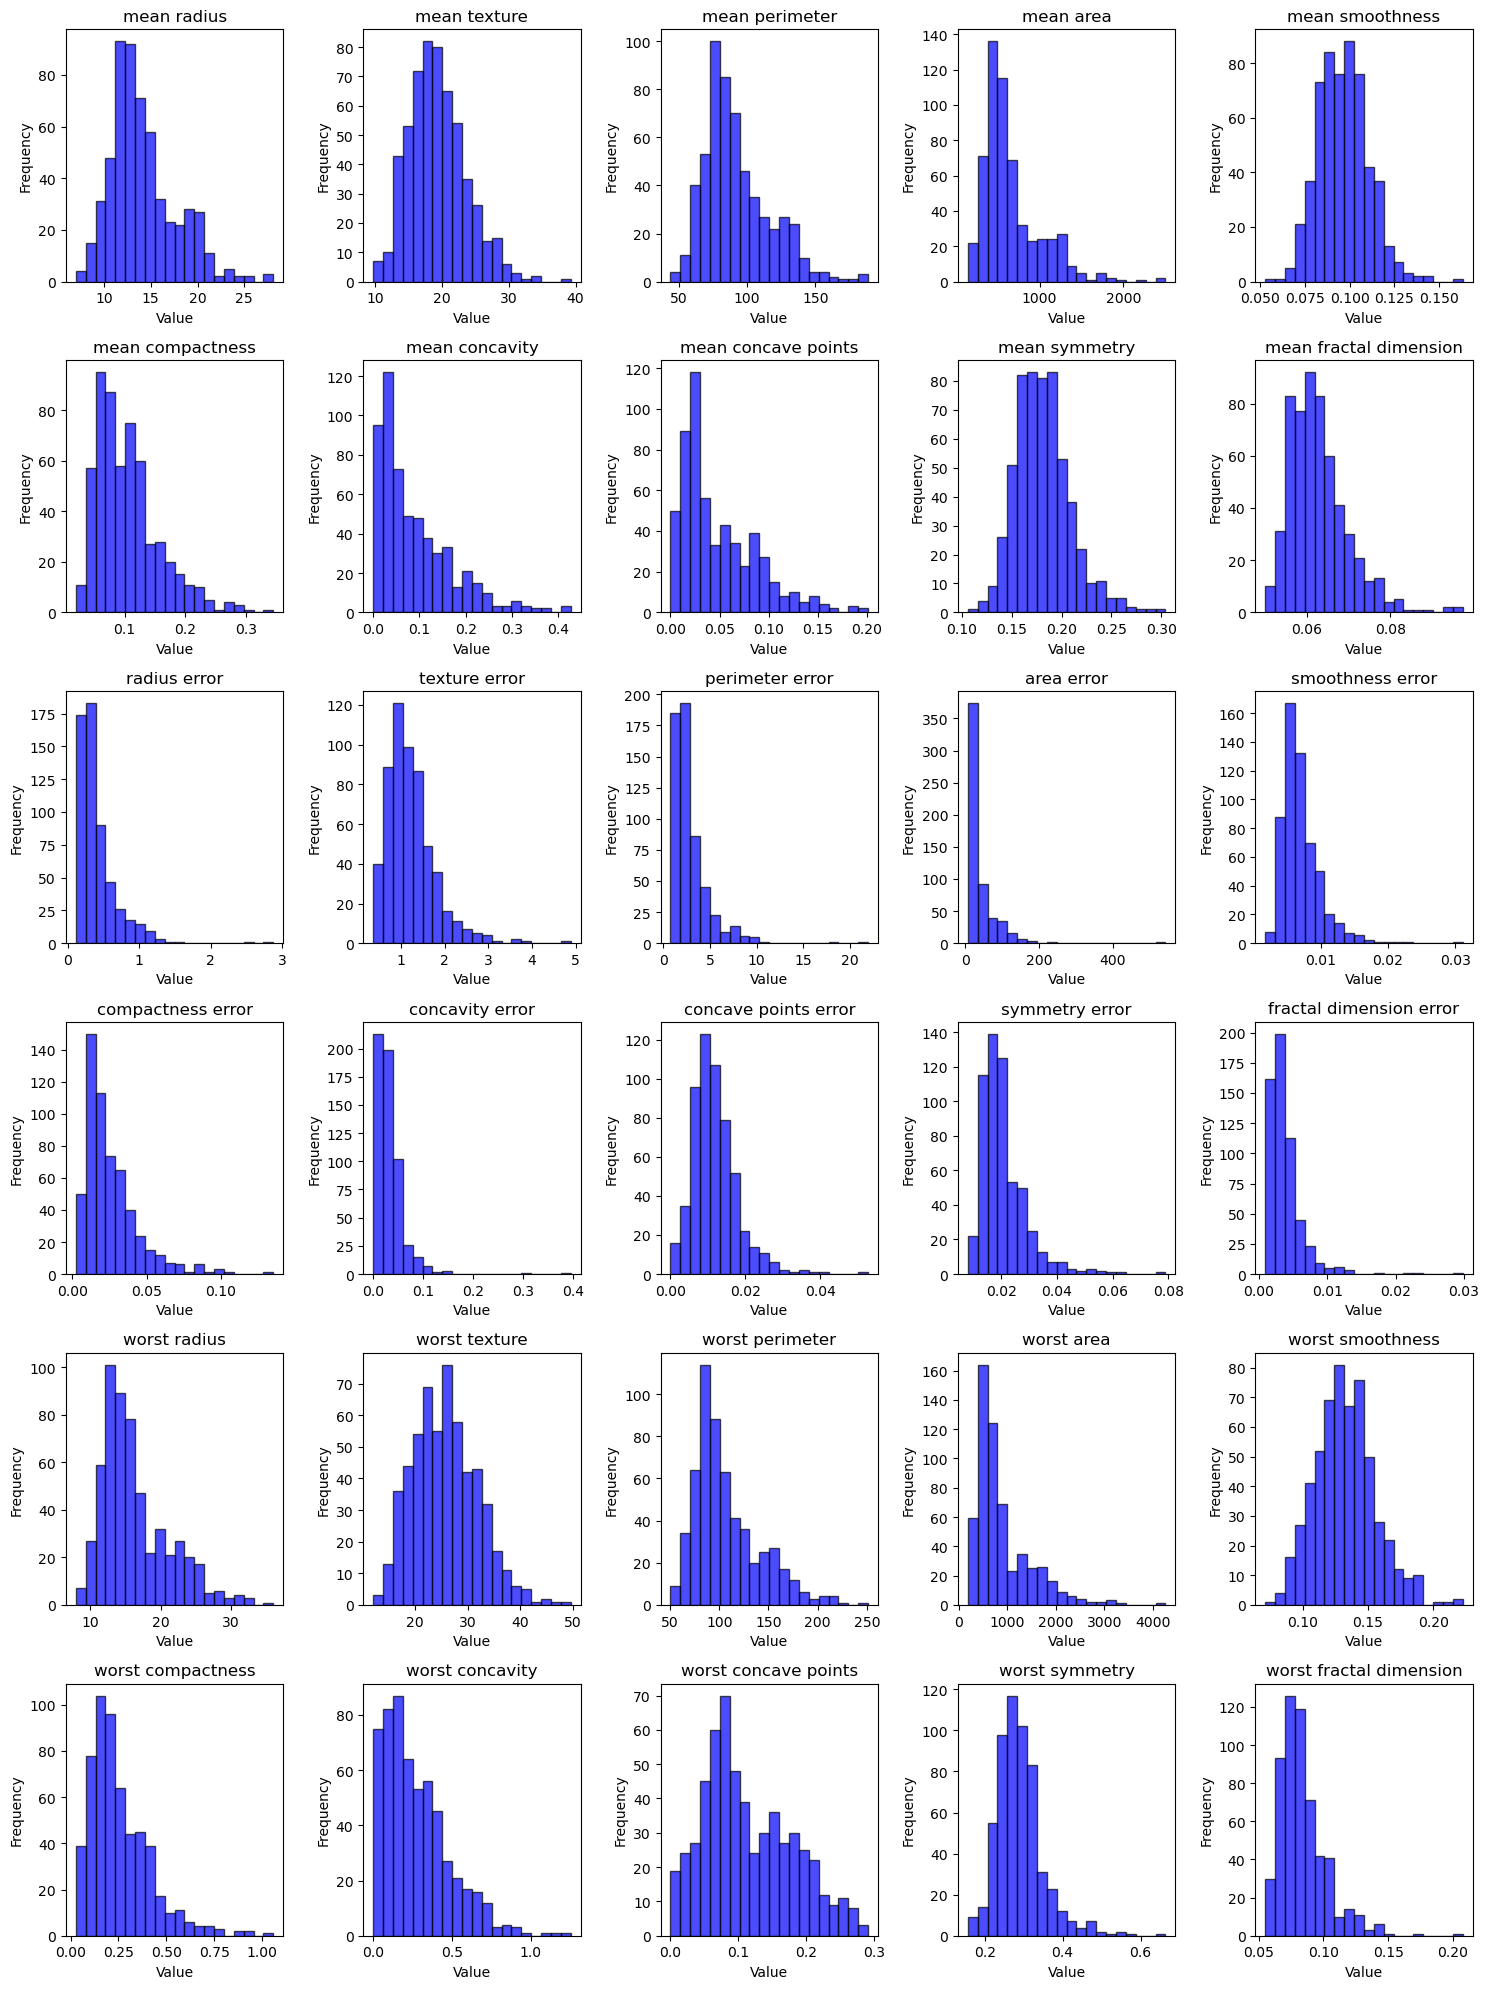

In [4]:
feature_names = bc.feature_names
plt.figure(figsize=(15, 20))
for i in range(X.shape[1]):
    plt.subplot(6, 5, i + 1)  # Arrange in a 6-row, 5-column grid
    plt.hist(X[:, i], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(feature_names[i])
plt.tight_layout()
plt.show()

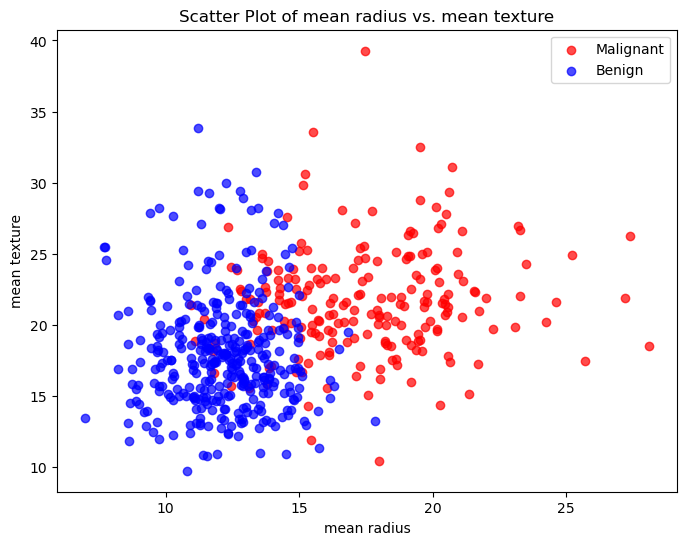

In [5]:
feature_x = 0  
feature_y = 1  
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, feature_x], X[y == 0, feature_y], color='red', label="Malignant", alpha=0.7)
plt.scatter(X[y == 1, feature_x], X[y == 1, feature_y], color='blue', label="Benign", alpha=0.7)
plt.xlabel(feature_names[feature_x])
plt.ylabel(feature_names[feature_y])
plt.title(f"Scatter Plot of {feature_names[feature_x]} vs. {feature_names[feature_y]}")
plt.legend()
plt.show()

**Data Preparation**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(f"shape of X_train is:{X_train.shape}")
print(f"shape of X_test is:{X_test.shape}")
print(f"shape of y_train:{y_train.shape}")
print(f"shape of y_test is:{y_test.shape}")

shape of X_train is:(455, 30)
shape of X_test is:(114, 30)
shape of y_train:(455, 1)
shape of y_test is:(114, 1)


In [7]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train) 
X_test_scale = scaler.transform(X_test) 
print(f"X_train before scale is:{X_train[1]}")
print("\n")
print(f"X_train after scale is:{X_train_scale[1]}")
print("\n")
print(f"X_test before scale is:{X_test[1]}")
print("\n")
print(f"X_test after scale is:{X_test_scale[1]}")

X_train before scale is:[2.109e+01 2.657e+01 1.427e+02 1.311e+03 1.141e-01 2.832e-01 2.487e-01
 1.496e-01 2.395e-01 7.398e-02 6.298e-01 7.629e-01 4.414e+00 8.146e+01
 4.253e-03 4.759e-02 3.872e-02 1.567e-02 1.798e-02 5.295e-03 2.668e+01
 3.348e+01 1.765e+02 2.089e+03 1.491e-01 7.584e-01 6.780e-01 2.903e-01
 4.098e-01 1.284e-01]


X_train after scale is:[ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
  2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
  0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
 -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
  0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]


X_test before scale is:[1.894e+01 2.131e+01 1.236e+02 1.130e+03 9.009e-02 1.029e-01 1.080e-01
 7.951e-02 1.582e-01 5.461e-02 7.888e-01 7.975e-01 5.486e+00 9.605e+01
 4.444e-03 1.652e-02 2.269e-02 1.370e-02 1.386e-02 1.698e-03 2.486e+01
 2.658e+01 1.659e+02 1.866e+03 1.193e-01 2

In [8]:
n = X_train_scale.shape[0]
X_b = np.hstack((np.ones((n,1)),X_train_scale))
print(f"shape of scaled x_train with bias is: {X_b.shape}")

shape of scaled x_train with bias is: (455, 31)


**Implement the model**

In [9]:
class logisticRegressionGD:
    def __init__(self, learning_rate=0.5, iterations=5000,threshold=0.5):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.threshold = threshold
        self.log_losses = []

    def sigmoid(self,z):
        z = np.clip(z, -500, 500)  
        return 1 / (1 + np.exp(-z))

    def predict(self,X):
        predict_y = X @ self.weights
        predict_prob = self.sigmoid(predict_y)
        return [1 if i >= self.threshold else 0 for i in predict_prob]  

    def score(self,X,y):
        prediction = self.predict(X)
        return np.mean(prediction == y)

    def fit(self,X,y):
        m,n = X.shape
        self.weights = np.random.randn(n,1) * 0.01
        for i in range(self.iterations):
            predict_y = X @ self.weights 
            predict_prob = self.sigmoid(predict_y)
            dw = (1/m) * X.T @ (predict_prob - y) 
            self.weights = self.weights - self.learning_rate * dw 

            if i % 100 == 0:
                log_loss = self.compute_log_loss(X, y)
                self.log_losses.append(log_loss)
        return self.weights

    def compute_log_loss(self, X, y):
        m = len(y)
        predict_y = X @ self.weights 
        predict_prob = self.sigmoid(predict_y)
        predict_prob = np.clip(predict_prob, 1e-15, 1 - 1e-15)
        log_loss = - (1/m) * np.sum(y * np.log(predict_prob) + (1 - y) * np.log(1 - predict_prob))
        return log_loss

    def plot_log_loss(self):
        plt.plot(range(0, self.iterations, 100), self.log_losses)
        plt.xlabel('Iteration')
        plt.ylabel('Log Loss')
        plt.title('Log Loss over Iterations')
        plt.show()
        return self.log_losses

In [10]:
logisticModel = logisticRegressionGD(learning_rate=0.5, iterations=5000,threshold=0.5)
weight = logisticModel.fit(X_b,y_train)
print(f"The coefficient vector w is:{weight}")

The coefficient vector w is:[[-0.27913178]
 [-0.06288963]
 [ 0.09631304]
 [ 0.09938877]
 [-0.17772212]
 [ 0.07045197]
 [ 2.30863742]
 [-1.54307554]
 [-2.98453924]
 [ 1.01943157]
 [-0.71623196]
 [-3.50060826]
 [ 0.58180925]
 [-0.76329395]
 [-2.435218  ]
 [-0.83444994]
 [ 0.70614561]
 [ 1.23467557]
 [-0.93497122]
 [ 1.20915189]
 [ 1.42775021]
 [-1.67773286]
 [-2.8919805 ]
 [-0.43542685]
 [-1.72592339]
 [-0.22070231]
 [ 0.18334735]
 [-2.29461068]
 [-1.33079348]
 [-2.82061527]
 [-0.08559516]]


**Calculate the four metrics using test dataset**

In [11]:
n = X_test_scale.shape[0]
X_b_test = np.hstack((np.ones((n,1)),X_test_scale))
y_pred = logisticModel.predict(X_b_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

Precision: 0.9857
Recall: 0.9718
F1 Score: 0.9787

Confusion Matrix:
[[42  1]
 [ 2 69]]


**Plot the log loss on every 100th iteration**

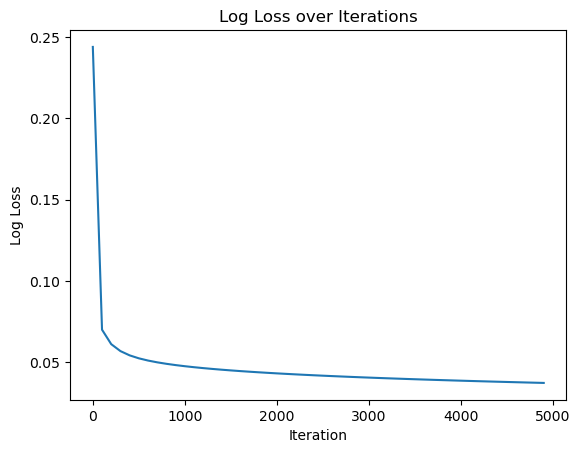

0.04778019331513617


In [12]:
loss  = logisticModel.plot_log_loss()
print(np.mean(loss)) 

**Finding the best hyperparameter** 

In [13]:
learning_rates = [0.01, 0.1, 0.5, 1.0]
iterations_list = [1000, 5000, 10000]
threshold_list = [0.5,0.3,0.7]
min_loss = logisticModel.compute_log_loss(X_b_test,y_test)
best_params = {'learning_rate': 0.5, 'iterations':5000 ,'threshold': 0.5, 'loss': min_loss}
losses = []

for lr in learning_rates:
    for it in iterations_list:
        for th in threshold_list:
            model = logisticRegressionGD(learning_rate=lr, iterations=it,threshold=th)
            
            model.fit(X_b, y_train)

            loss = model.compute_log_loss(X_b_test,y_test)
            
            print(f"Learning rate: {lr}, Iterations: {it}, threshold:{th}, log loss is: {loss:.4f}")
            losses.append(loss)
            
            if loss < min_loss:
                min_loss = loss
                best_params = {'learning_rate': lr, 'iterations': it,'threshold': th, 'loss': loss}

print(f"Best Hyperparameters: {best_params}")

Learning rate: 0.01, Iterations: 1000, threshold:0.5, log loss is: 0.0904
Learning rate: 0.01, Iterations: 1000, threshold:0.3, log loss is: 0.0901
Learning rate: 0.01, Iterations: 1000, threshold:0.7, log loss is: 0.0900
Learning rate: 0.01, Iterations: 5000, threshold:0.5, log loss is: 0.0617
Learning rate: 0.01, Iterations: 5000, threshold:0.3, log loss is: 0.0618
Learning rate: 0.01, Iterations: 5000, threshold:0.7, log loss is: 0.0617
Learning rate: 0.01, Iterations: 10000, threshold:0.5, log loss is: 0.0569
Learning rate: 0.01, Iterations: 10000, threshold:0.3, log loss is: 0.0569
Learning rate: 0.01, Iterations: 10000, threshold:0.7, log loss is: 0.0571
Learning rate: 0.1, Iterations: 1000, threshold:0.5, log loss is: 0.0571
Learning rate: 0.1, Iterations: 1000, threshold:0.3, log loss is: 0.0569
Learning rate: 0.1, Iterations: 1000, threshold:0.7, log loss is: 0.0570
Learning rate: 0.1, Iterations: 5000, threshold:0.5, log loss is: 0.0570
Learning rate: 0.1, Iterations: 5000, t

**visualization of all the log loss when tuning hyperparameter**

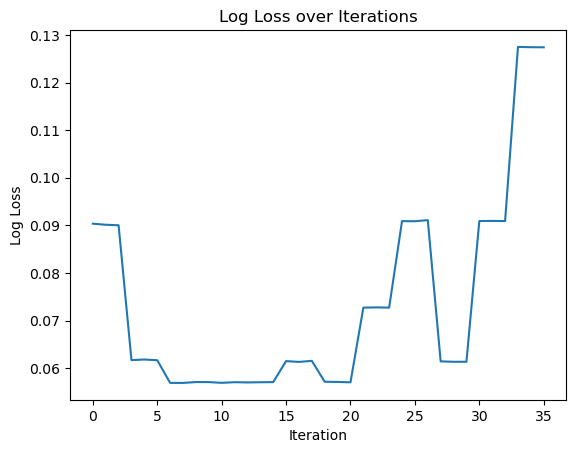

In [14]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.show()